In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
import numpy as np


In [ ]:
# Load the CSV file
df = pd.read_csv("merged_dataset.csv")

# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Normalize country names
df["Country"] = df["Country"].str.strip().str.lower()




In [ ]:
# Filter the dataset for Egypt only
egypt_df = df[df["Country"] == "egypt"].copy()

# Convert 'Year' to numeric
egypt_df["Year"] = pd.to_numeric(egypt_df["Year"], errors='coerce')
egypt_df = egypt_df.dropna(subset=["Year"])
egypt_df = egypt_df.sort_values("Year")
egypt_df.to_csv("egypt_data.csv", index=False)

In [ ]:
print(egypt_df.columns.tolist())

['Identifier', 'General (=1 if General)', 'Source', 'Country', 'Reg', 'Inc', 'Historical Inc', 'Year', 'ISO', 'General Notes', 'Caution1 Accuracy, Quality or Comparability of data is questionable', 'Caution 1  Notes', 'Caution2 Un-excluded resource revenues / taxes are significant but cannot be isolated from total revenues / taxes', 'Caution3 Un-excluded Resource Revenues/Taxes are Marginal, but Non-Negligible and cannot be isolated from total revenue / taxes', 'Resource Revenue Notes', 'Caution 4 Inconsistencies with Social Contributions', 'Social contributions notes', 'Total Revenue', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Total Resource Revenue', 'Total Non-Resource Revenue (inc SC)', 'Taxes', 'Unnamed: 24', 'Resource Taxes', 'Non-Resource Tax', 'Unnamed: 27', 'Direct Taxes', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Taxes on Income, Profits & Capital Gains', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Taxes on Payroll & Work

In [ ]:
# Define revenue-related columns with percentage values
cols = [
    "Total Revenue",
    "Taxes on Income, Profits & Capital Gains",
    "Taxes on Goods and Services",
    "Taxes on International Trade",
    "Non-Tax Revenue"
]

# Remove '%' sign and convert to numeric
for col in cols:
    if col in egypt_df.columns:
        egypt_df[col] = egypt_df[col].str.replace('%', '', regex=False)
        egypt_df[col] = pd.to_numeric(egypt_df[col], errors='coerce')


In [ ]:
# Preview raw values in revenue columns
cols = [
    "Total Revenue",
    "Taxes on Income, Profits & Capital Gains",
    "Taxes on Goods and Services",
    "Taxes on International Trade",
    "Non-Tax Revenue"
]

print("🔍 First 5 raw values in each column:")
for col in cols:
    print(f"\nColumn: {col}")
    print(egypt_df[col].unique())


🔍 First 5 raw values in each column:

Column: Total Revenue
[nan]

Column: Taxes on Income, Profits & Capital Gains
[4.36 4.29 4.2  5.48 6.83 6.73 6.52 5.66 5.68 5.41 5.11 5.18 5.62 5.63
 4.93 4.75 5.35 5.58 7.43 7.47 7.12 7.32 6.04 6.21 5.16 6.01 5.39 5.04
 5.05 4.57 4.43 4.47 4.66]

Column: Taxes on Goods and Services
[3.18 3.06 2.98 2.84 2.88 4.32 4.35 4.39 4.33 4.17 4.27 4.71 4.83 4.73
 5.26 5.27 5.2  5.55 5.39 5.09 5.34 5.77 5.79 5.78 5.38 5.45 4.82 5.46
 5.75 5.71 6.3  6.26 5.36]

Column: Taxes on International Trade
[3.56 3.67 3.53 2.89 2.79 3.14 3.03 3.33 3.27 3.28 2.97 3.42 2.6  2.44
 2.38 2.57 1.81 1.37 1.49 1.32 1.29 1.16 0.96 0.84 0.86 0.79 0.85 0.98
 0.94 0.8  0.75 0.53]

Column: Non-Tax Revenue
[ 5.04  5.14  4.55  3.86  7.16  7.9   8.7   8.53  7.58  6.98  6.35  5.57
  6.39  6.4   5.68  5.84  6.86  6.8   6.01  7.86  7.92  8.79 10.16  7.32
  4.92  4.87  4.8   4.49  5.19  4.73  5.39  3.81  3.68  3.83]


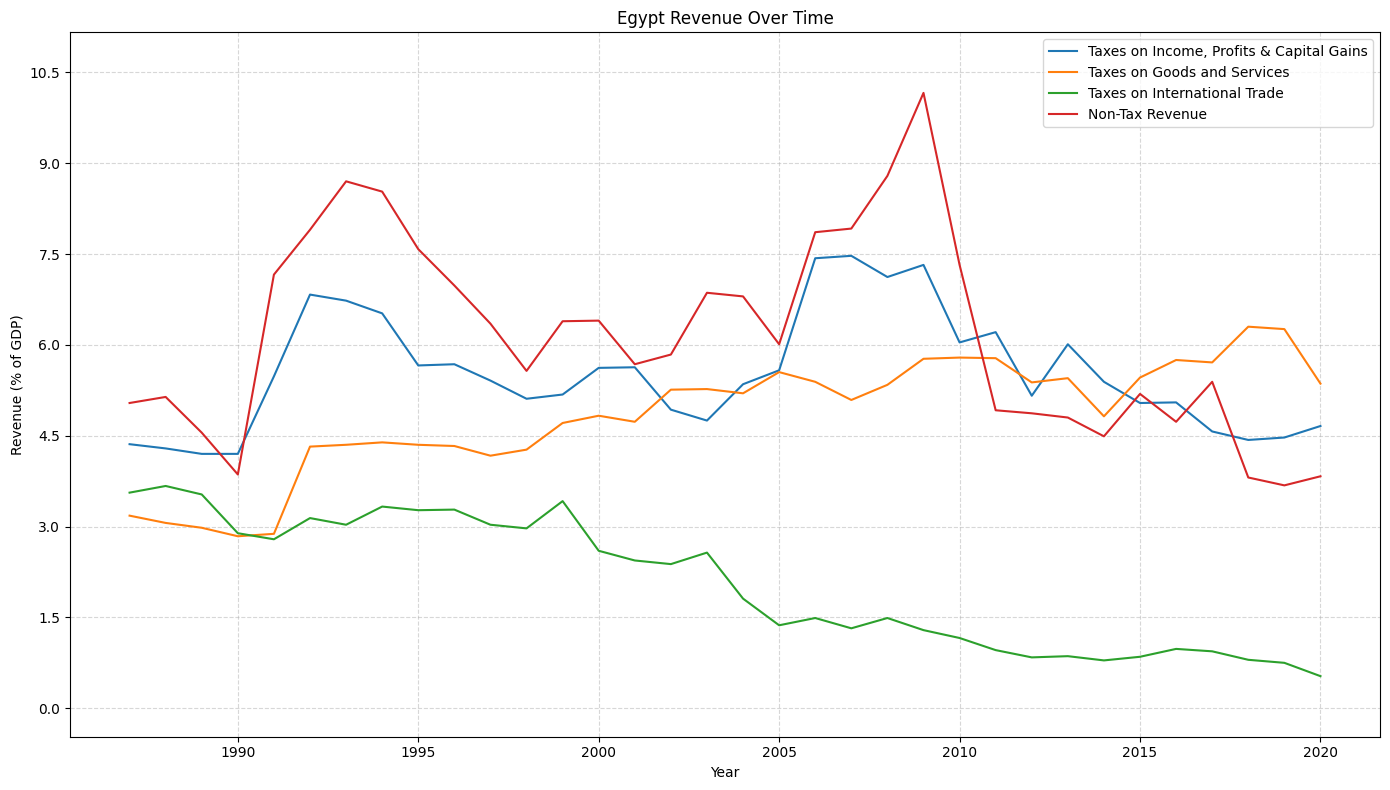

In [ ]:
# Select only the valid (non-empty) columns
valid_cols = [col for col in cols if egypt_df[col].notna().sum() > 0]

# Plot
plt.figure(figsize=(14, 8))
for col in valid_cols:
    plt.plot(egypt_df["Year"], egypt_df[col], label=col)

# Y-axis limits
if valid_cols:
    ymin = egypt_df[valid_cols].min().min()
    ymax = egypt_df[valid_cols].max().max()
    if pd.notna(ymin) and pd.notna(ymax):
        plt.ylim(ymin - 1, ymax + 1)

# Format the chart
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.1f"))

plt.title("Egypt Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue (% of GDP)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Important Notes:**

1.   GDP --> Gross Domestic Produc --> total value of everything a country produces and earns in one year.
2.   We don't care about the GDP per year ; however , we care about the representation of each revenue type over the years
3. When the government collects revenue (like taxes), we often compare it to GDP to understand:

          Is the government collecting a healthy amount?

          Is spending too high or low compared to the country’s income?
4. Each line (like "Income Tax" or "Non-Tax Revenue") shows how big that revenue source is compared to the country’s economy.
5. Assign higher weights to stable sources in your optimization model.



| Revenue Type             | Reliable? | Trend     | How to Use It         |
| ------------------------ | --------- | --------- | --------------------- |
| **Income Tax**           | Yes     | Stable    | Fund essential things |
| **Goods & Services Tax** | Yes     | Growing   | Fund subsidies, roads |
| **Non-Tax Revenue**      | No      | Unstable  | Use carefully         |
| **Trade Tax**            | No      | Shrinking | Avoid relying on it   |


Example -->


  100 billion budget:
- 40 billion from Income Tax → Education + Health
- 30 billion from Goods & Services Tax → Roads + Utilities
- 20 billion from Non-Tax → Infrastructure + Emergency
- 10 billion from Trade Tax → Only optional spending